# Лабораторная работа №1

Импортируем нужные библиотеки:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st

 Определяем функцию $statistic$. Опишем некоторые выводимые значения:
1. $Std$ : среднеквадратическое отклонение - характеризует меру рассеяния данных;
2. $Median$ : делит пополам распределение. Грубо говоря, медианой СВ является такое число, что вероятность получить значение СВ справа от него равна вероятности получить значение слева от него (и они обе равны 1/2);
3. Квартиль - это то значение, которое делит ранжированные данные на части, кратные одной четверти (бывает 1 - 25%, 2 - 50%, т.е. медиана, 3 - 75%). Межквартильный размах - разность между 3 и 1 квартилями;
4. $Mode$ : мода чисел - число, которое встречаеться в данном ряду чаще всего. В нашем случае мода равна минимальному, т.к. в нашем распределение все значения разные;
5. $Skew$ : асимметрия -  величина, характеризующая асимметрию распределения данной СВ (показатель симметричности / скошенности кривой распределения). Вычисляеться по формуле: $m_3/s^3$, где $m_3$ - третий центральный момент, s - среднеквадратическое отклонение;
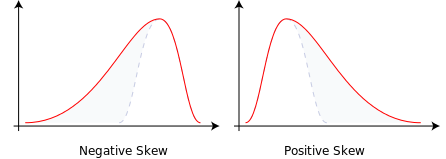
<img src="img/skew.png">
6. $Kurtosis$ : экспрессия - мера остроты пика распределения СВ. Вычисляеться по формуле: $m_4/s^4 - 3$, где $m_4$ - четвертый центральный момент, s - среднеквадратическое отклонение;

 График "Гистограмма" : по оси X - значения нашей выборки, по оси Y - плотности распределения СВ.
 
 График "Ящик с усами" (та же - диаграмма размаха) : по оси Х - значения нашей выборки; для его построения нужны: 1-й, 3-й квантиля, медиана, мин, макс.
 
 График "Квантиль-квантиль" : производит диаграмму рассеяния с квантилями переменной по горизонтальной оси и ожидаемым нормальным распределением по вертикальной оси. По оси Х - квантеля нашей выборки, по оси Y - квантеля нормального распределения?? 

In [92]:
def statistic(data):
    print('Число элементов : ', len(data))
    print('Среднее : ', data.mean())
    print('Min : ', data.min())
    print('Max : ', data.max())
    print('Std : ', data.std())
    print('Median : ', np.median(data))
    first_kvartil = np.percentile(data, 25)
    third_kvartil = np.percentile(data, 75)
    print('25% : ', first_kvartil)
    print('75% : ', third_kvartil)
    print('Межквартильный размах : ', third_kvartil - first_kvartil)
    print('Mode : ', st.mode(data))
    print('Skew : ', st.skew(data))
    print('kurtosis : ', st.kurtosis(data))
    print()
    
    print('Гистограмма:')
    sns.distplot(data, axlabel='Случайные величины')
    plt.show()
    print('\"Ящик с усами\":')
    sns.boxplot(data=data)
    plt.show()
    print('График \"Квантиль квантиль\":')
    res = st.probplot(normal_distribution, plot=plt)
    plt.show()

# Нормальное распределение:
Моделируем n = 1000 реализаций случайной величины из нормального закона распределения $N(m, s^2)$ с заданными параметрами:

In [93]:
m1, s1, size = 1, 3, 1000

In [94]:
normal_distribution = np.random.normal(m1, s1, size)

Число элементов :  1000
Среднее :  0.998132311315
Min :  -8.12836666054
Max :  9.12063841373
Std :  2.94083040674
Median :  1.14306389142
25% :  -1.10262199596
75% :  3.0419298667
Межквартильный размах :  4.14455186266
Mode :  ModeResult(mode=array([-8.12836666]), count=array([1]))
Skew :  -0.12369402549440889
kurtosis :  -0.22467395163094928

Гистограмма:


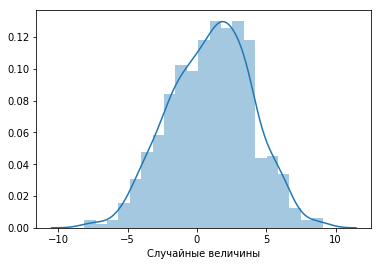

"Ящик с усами":


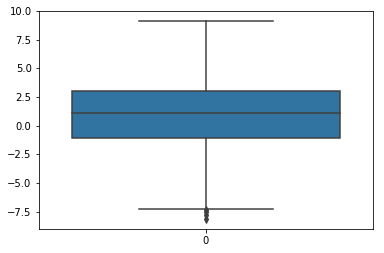

График "Квантиль квантиль":


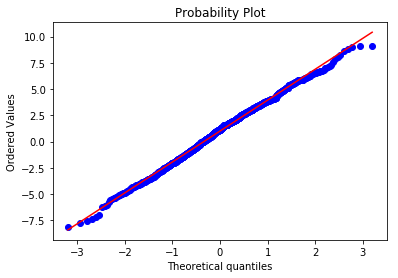

In [95]:
statistic(normal_distribution)

## Критерий Колмогорова-Смирнова:

Классический критерий Колмогорова (иногда говорят Колмогорова-Смирнова) предназначен для проверки простых гипотез о принадлежности анализируемой выборки некоторому полностью известному закону распределения. Обозначим нулевую гипотезу в критерии КС, как гипотезу о том, что выборка подчиняеться закону раcпределения F(x).

Функция st.kstest принимает параметры:
1. Наша выборка;
2. Имя распределения в библиотеке scipy.stats;
3. Агрументы для этого распределения.

На выходе:
1. Статистику критерия D, где определения D можно увидеть ниже:
<img src="img/KS.png">
2. pvalue : вероятность того, что статистика критерия (См. 1-й пункт) будет такой же, как и наблюдаемая, предполагая, что нулевая гипотеза верна. Нулевая гипотеза состоит в том, что наша выборка подчиняеться нормальному закону. Чтобы отклонить нулевую гипотезу значение pvalue должно быть (приблизительно) меньше 0,05 или 0,01. Если это значение pvalue в этом будет меньше 0,05, мы тогда скажем, что наша выборка существенно отличается от нормального распределения.

In [96]:
st.kstest(normal_distribution, 'norm', args=(m1, s1))

KstestResult(statistic=0.035819956520953711, pvalue=0.15001204577534111)

 ## χ2 критерий Пирсона:

Критерий согласия Пирсона, или критерий согласия(Хи-квадрат) — критерий для проверки гипотезы о принадлежности наблюдаемой выборки некоторому теоретическому закону распределения $F(x)$. 

Функция st.pearsonr принимает параметры:
(x, y) : две выборки, в нашем случае наша выборка и только что созданнай новая выборка(по нормальному закону).

На выходе:
1. Коэффициенты корреляции Пирсона : коэффициенты варьируется от -1 до +1, где 0 - означает отсутствие корреляция. Корреляции -1 или +1 означают точное линейное отношения. +1 - с ростом х возрастает у. -1 - при возрастании x, y уменьшается.
2. pvalue.

In [97]:
st.pearsonr(normal_distribution, np.random.normal(m1, s1, size))

(0.033297405860074986, 0.2928311317065766)

In [236]:
st.ks_2samp(normal_distribution, normal_distribution)

Ks_2sampResult(statistic=0.0, pvalue=1.0)

In [237]:
st.ks_2samp(distributionLaw(m, s, 1000), distributionLaw(m, s, 1000))

Ks_2sampResult(statistic=0.037999999999999978, pvalue=0.45857979165717483)

С ростом n cтатистика уменьшаеться, т.к. распределения более похожи и у нас уменьшаеться количество шума.

## Логнормальное
Моделируем 1000 СВ с логнормальным распределение $LN(m, s2), m = 1, s^2 = 2$ c заданными параметрами:

In [98]:
m2, s2 = 1, np.sqrt(2)

Число элементов :  1000
Среднее :  7.30763031747
Min :  0.0432355521272
Max :  211.310611007
Std :  15.1705181286
Median :  2.64625361929
25% :  0.983034014048
75% :  7.28145825847
Межквартильный размах :  6.29842424442
Mode :  ModeResult(mode=array([ 0.04323555]), count=array([1]))
Skew :  6.498999045939833
kurtosis :  61.354131325610965

Гистограмма:


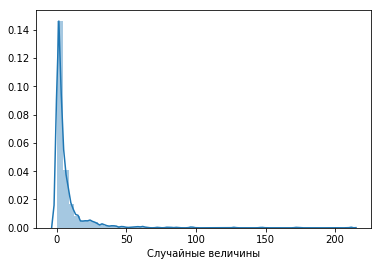

"Ящик с усами":


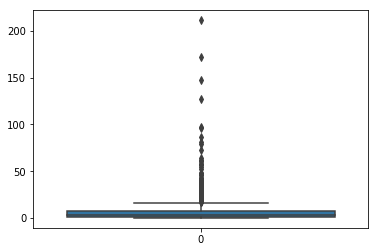

График "Квантиль квантиль":


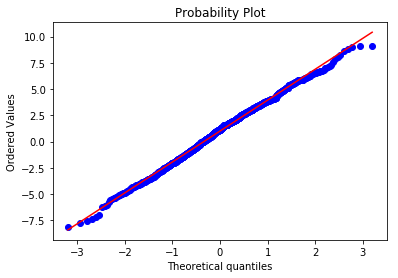

In [99]:
log_norm_dictribution = np.random.lognormal(m2, s2, 1000)
statistic(log_norm_dictribution)

Проверим критерии Колмогорова-Смирнова и Пирсона:


In [100]:
st.kstest(log_norm_dictribution, 'lognorm', args=(m2, s2))

KstestResult(statistic=0.33866928763186133, pvalue=0.0)

Т.е. по критерию Колмогорова-Смирнова - наша выборка не принадлежит логнормальному закону распределения.

In [101]:
st.pearsonr(log_norm_dictribution, np.random.lognormal(m2, s2, size))

(-0.010045330022137278, 0.75103727692442179)

По критерию Пирсона, у наша выборка из логнормального закона распределения!

# Выборка с засорениями

Число элементов :  1000
Среднее :  1.25687114869
Min :  -9.57098714025
Max :  159.246953713
Std :  6.26190745388
Median :  0.971315023596
25% :  -0.997036405443
75% :  2.92234024506
Межквартильный размах :  3.9193766505
Mode :  ModeResult(mode=array([-9.57098714]), count=array([1]))
Skew :  16.999616203940878
kurtosis :  410.9780776542597

Гистограмма:


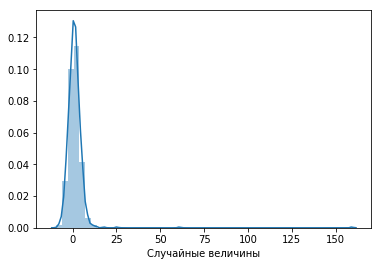

"Ящик с усами":


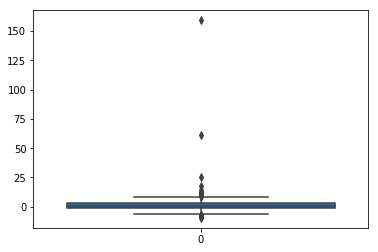

График "Квантиль квантиль":


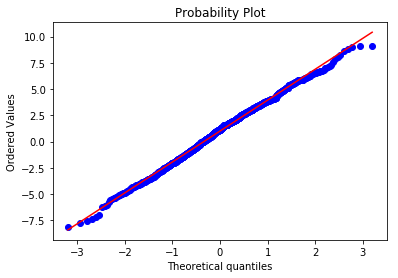

In [102]:
clogged_data = np.concatenate((np.random.normal(m1, s1, size - 50), np.random.lognormal(m2, s2, 50)), axis=0)
statistic(clogged_data)

In [103]:
st.kstest(clogged_data, 'norm', args=(m1, s1))

KstestResult(statistic=0.019434710446894488, pvalue=0.84440922867278712)

In [104]:
st.pearsonr(clogged_data, np.random.normal(m2, s2, size))

(0.031300456829430522, 0.32275529772155187)

Тогда из результатов критериев, мы можем сделать вывод, что наша выборка принадлежит к нормальному распределению.